## Final Project Submission

Please fill out: 
* Student name: Dennis Walubengo
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Samuel Karu
* Blog post URL:


Step 1: Data Acquisition and Preparation

In [3]:
# Your code here - remember to use markdown cells for comments as well!
# Import necessary libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os

In [24]:
# Load the SQLite database
conn = sqlite3.connect('zippedData/im.db')  

# Load the CSV file
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip')


In [25]:
# List all tables in the database (optional)
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
print("Tables in the database:", tables['name'].tolist())

# Load tables from SQLite database
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)

# Close the SQLite connection
conn.close()

# Inspect the movies DataFrame
print("Movies DataFrame:")
print(movie_basics.info())
print(movie_basics.head())


# Inspect the ratings DataFrame
print("\nRatings DataFrame:")
print(movie_ratings.info())
print(movie_ratings.head())


Tables in the database: ['movie_basics', 'directors', 'known_for', 'movie_akas', 'movie_ratings', 'persons', 'principals', 'writers']
Movies DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of

In [22]:
# Inspect the data
print("Movie Basics Data")
print(movie_basics.info())
print(movie_basics.head())

print("\nMovie Ratings Data")
print(movie_ratings.info())
print(movie_ratings.head())

print("\nBox Office Mojo Data")
print(bom_movie_gross.info())
print(bom_movie_gross.head())

Movie Basics Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Oper

Step 2: Data Cleaning and Preprocessing

In [26]:
# Basic Data Cleaning
# Remove duplicates
movie_basics.drop_duplicates(inplace=True)
movie_ratings.drop_duplicates(inplace=True)
bom_movie_gross.drop_duplicates(inplace=True)

# Handle missing values
# Drop rows with missing essential values
movie_basics.dropna(subset=['primary_title'], inplace=True)
bom_movie_gross.dropna(subset=['title'], inplace=True)

# Fill or handle other missing values as needed
# Here, we just fill numeric missing values with zero
bom_movie_gross.fillna(0, inplace=True)


In [27]:
# Inspect the data
print("Box Office Mojo Data")
print(bom_movie_gross.info())
print(bom_movie_gross.head())
print(bom_movie_gross.describe())

# Basic Data Cleaning
# Remove duplicates
bom_movie_gross.drop_duplicates(inplace=True)

# Handle missing values
# Drop rows with missing essential values
bom_movie_gross.dropna(subset=['title'], inplace=True)

# Fill or handle other missing values as needed
# Here, we just fill numeric missing values with zero
bom_movie_gross.fillna(0, inplace=True)

# Save cleaned data for future use
bom_movie_gross.to_csv('cleaned_movie_gross.csv', index=False)


Box Office Mojo Data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.8+ KB
None
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1 

Step 3: Exploratory Data Analysis (EDA)

In [29]:
# Step 1: Data Summary and Statistics
print("Data Summary:")
print(bom_movie_gross.info())

# convert 'domestic_gross' and 'foreign_gross' to numeric data
bom_movie_gross['domestic_gross'] = pd.to_numeric(bom_movie_gross['domestic_gross'], errors='coerce')
bom_movie_gross['foreign_gross'] = pd.to_numeric(bom_movie_gross['foreign_gross'], errors='coerce')

Data Summary:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.8+ KB
None


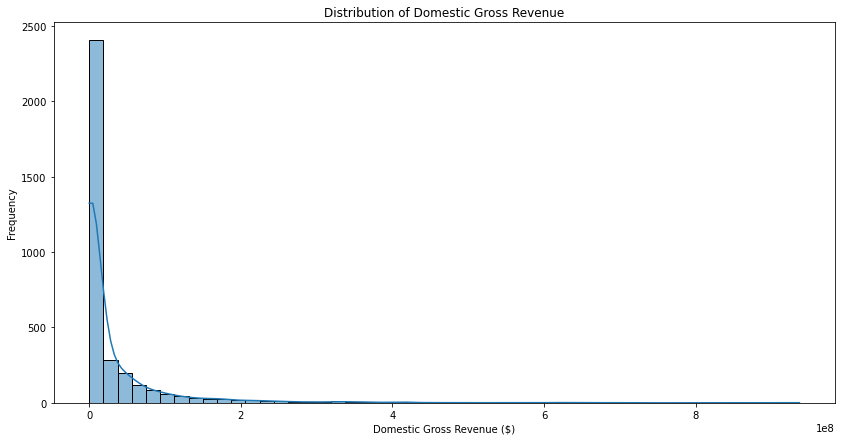

In [30]:
# Step 2: Distribution of Numeric Variables
plt.figure(figsize=(14, 7))
sns.histplot(bom_movie_gross['domestic_gross'], bins=50, kde=True)
plt.title('Distribution of Domestic Gross Revenue')
plt.xlabel('Domestic Gross Revenue ($)')
plt.ylabel('Frequency')
plt.show()

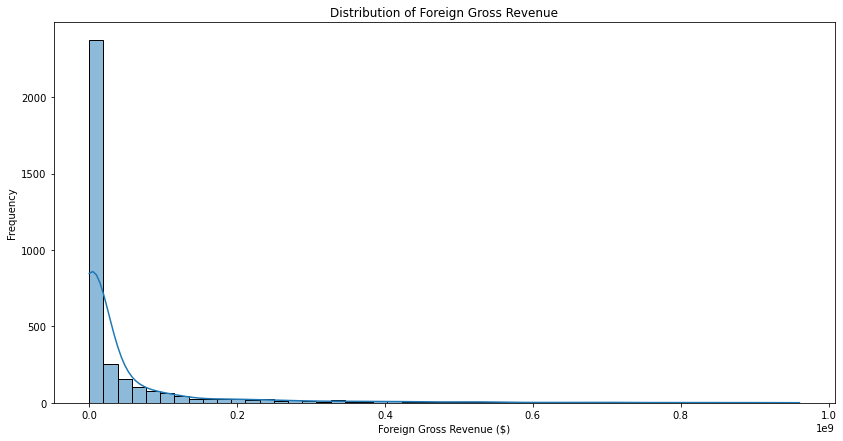

In [31]:
plt.figure(figsize=(14, 7))
sns.histplot(bom_movie_gross['foreign_gross'], bins=50, kde=True)
plt.title('Distribution of Foreign Gross Revenue')
plt.xlabel('Foreign Gross Revenue ($)')
plt.ylabel('Frequency')
plt.show()

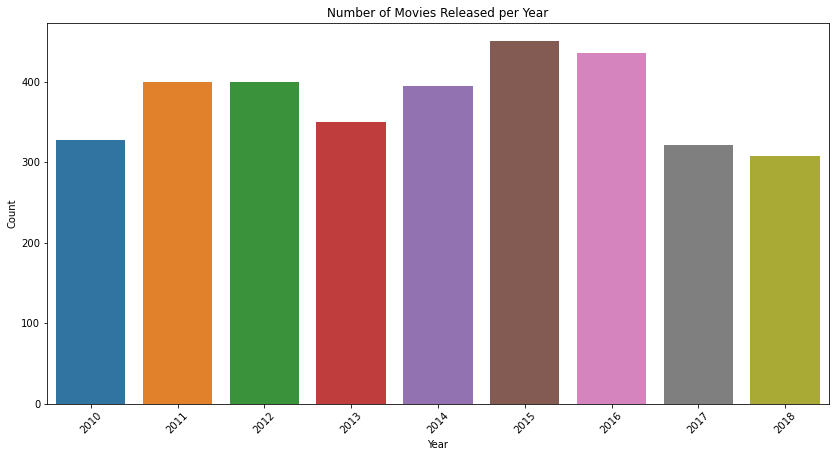

In [32]:
# Step 3: Analysis of Categorical Variables (Yearly Distribution of Movies)
plt.figure(figsize=(14, 7))
sns.countplot(x='year', data=bom_movie_gross)
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

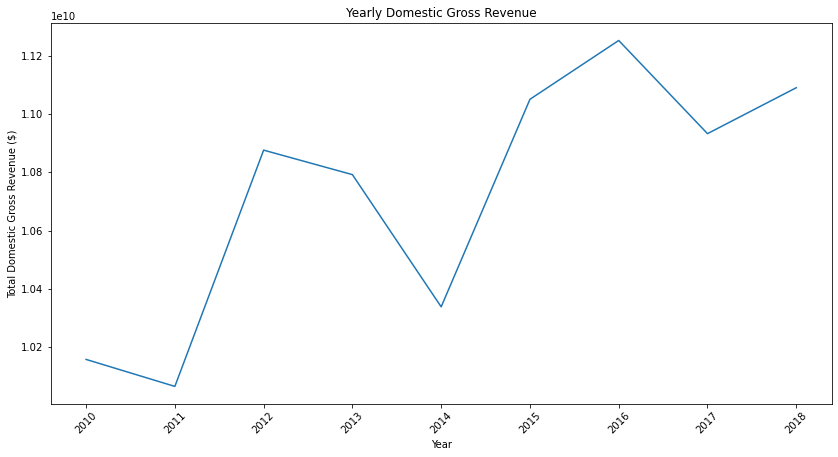

In [33]:
# Step 4: Trends Over Time (Yearly Domestic Gross Revenue)
plt.figure(figsize=(14, 7))
yearly_revenue = bom_movie_gross.groupby('year')['domestic_gross'].sum().reset_index()
sns.lineplot(data=yearly_revenue, x='year', y='domestic_gross')
plt.title('Yearly Domestic Gross Revenue')
plt.xlabel('Year')
plt.ylabel('Total Domestic Gross Revenue ($)')
plt.xticks(rotation=45)
plt.show()

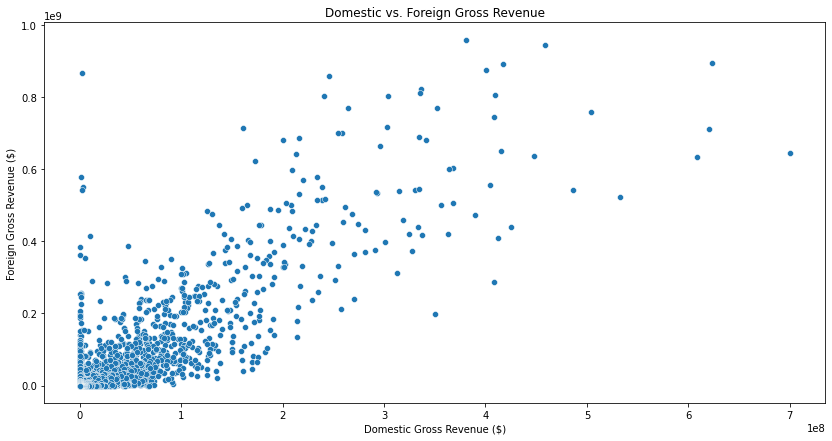

In [34]:
# Step 5: Correlations and Relationships (Domestic vs. Foreign Gross Revenue)
plt.figure(figsize=(14, 7))
sns.scatterplot(data=bom_movie_gross, x='domestic_gross', y='foreign_gross')
plt.title('Domestic vs. Foreign Gross Revenue')
plt.xlabel('Domestic Gross Revenue ($)')
plt.ylabel('Foreign Gross Revenue ($)')
plt.show()

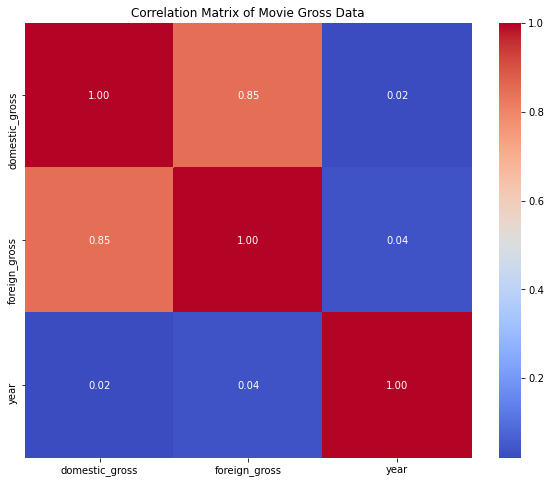

In [35]:
# Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = bom_movie_gross.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Movie Gross Data')
plt.show()

In [36]:
# Step 6: Top Movies by Revenue
top_movies_domestic = bom_movie_gross.sort_values(by='domestic_gross', ascending=False).head(10)
top_movies_foreign = bom_movie_gross.sort_values(by='foreign_gross', ascending=False).head(10)

print("Top 10 Movies by Domestic Gross Revenue:")
print(top_movies_domestic[['title', 'domestic_gross']])

print("\nTop 10 Movies by Foreign Gross Revenue:")
print(top_movies_foreign[['title', 'foreign_gross']])

Top 10 Movies by Domestic Gross Revenue:
                             title  domestic_gross
1872  Star Wars: The Force Awakens     936700000.0
3080                 Black Panther     700100000.0
3079        Avengers: Infinity War     678800000.0
1873                Jurassic World     652300000.0
727          Marvel's The Avengers     623400000.0
2758      Star Wars: The Last Jedi     620200000.0
3082                 Incredibles 2     608600000.0
2323  Rogue One: A Star Wars Story     532200000.0
2759   Beauty and the Beast (2017)     504000000.0
2324                  Finding Dory     486300000.0

Top 10 Movies by Foreign Gross Revenue:
                                            title  foreign_gross
328   Harry Potter and the Deathly Hallows Part 2    960500000.0
1875                      Avengers: Age of Ultron    946400000.0
727                         Marvel's The Avengers    895500000.0
3081               Jurassic World: Fallen Kingdom    891800000.0
1127                            

Time Trends: Movie Success Over Time

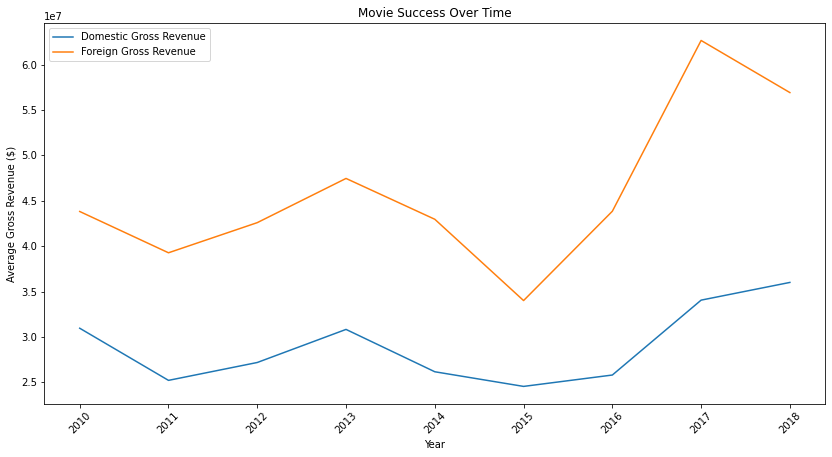

In [37]:
# Group by year and calculate the mean domestic and foreign gross revenue
yearly_revenue = bom_movie_gross.groupby('year')[['domestic_gross', 'foreign_gross']].mean().reset_index()
    
#  Plot the trend of domestic and foreign gross revenue over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_revenue, x='year', y='domestic_gross', label='Domestic Gross Revenue')
sns.lineplot(data=yearly_revenue, x='year', y='foreign_gross', label='Foreign Gross Revenue')
plt.title('Movie Success Over Time')
plt.xlabel('Year')
plt.ylabel('Average Gross Revenue ($)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [38]:
# Load the movie budget data
budget_data = pd.read_csv("zippedData/tn.movie_budgets.csv")
budget_data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [39]:
# Convert 'production_budget', 'domestic_gross', and 'worldwide_gross' to numeric values
budget_data['production_budget'] = budget_data['production_budget'].apply(lambda x: float(x[1:].replace(',', '')) if isinstance(x, str) else x)
budget_data['domestic_gross'] = budget_data['domestic_gross'].apply(lambda x: float(x[1:].replace(',', '')) if isinstance(x, str) else x)
budget_data['worldwide_gross'] = budget_data['worldwide_gross'].apply(lambda x: float(x[1:].replace(',', '')) if isinstance(x, str) else x)

# Calculate the net profit for each movie
budget_data['net_profit'] = budget_data['worldwide_gross'] - budget_data['production_budget']

In [40]:
# Display the first few rows of the dataset including net profit
print(budget_data.head())

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross    net_profit  
0        425000000.0     760507625.0     2.776345e+09  2.351345e+09  
1        410600000.0     241063875.0     1.045664e+09  6.350639e+08  
2        350000000.0      42762350.0     1.497624e+08 -2.002376e+08  
3        330600000.0     459005868.0     1.403014e+09  1.072414e+09  
4        317000000.0     620181382.0     1.316722e+09  9.997217e+08  


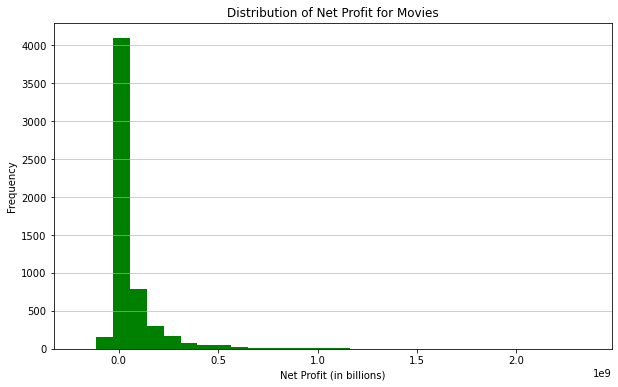

In [41]:
# Visualize the distribution of net profit
budget_data['net_profit'].plot(kind='hist', bins=30, color='green', figsize=(10, 6))
plt.title('Distribution of Net Profit for Movies')
plt.xlabel('Net Profit (in billions)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

Step 5: Visualization and Communication

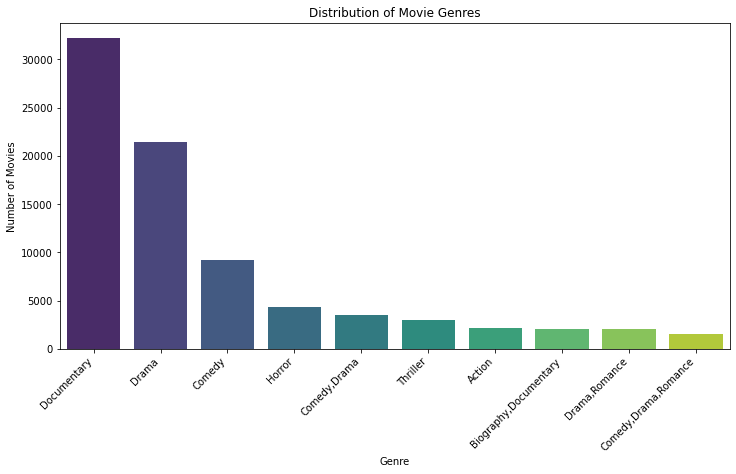

In [42]:
# Visualization 1: Distribution of Movie Genres
plt.figure(figsize=(12, 6))
sns.countplot(data=movie_basics, x='genres', palette='viridis', order=movie_basics['genres'].value_counts().index[:10])
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

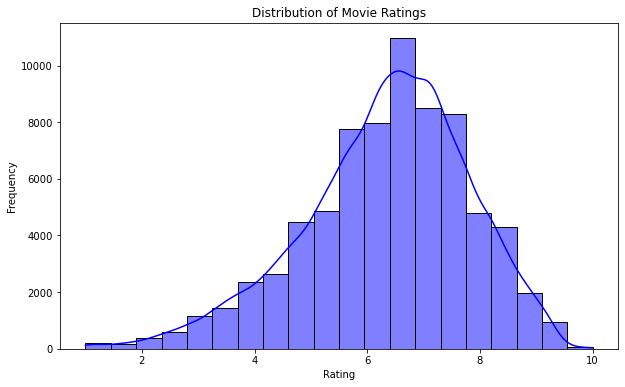

In [43]:
# Visualization 2: Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=movie_ratings, x='averagerating', bins=20, kde=True, color='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

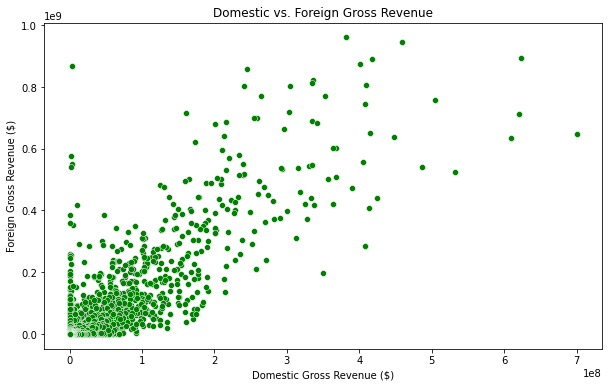

In [44]:
# Visualization 3: Domestic vs. Foreign Gross Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bom_movie_gross, x='domestic_gross', y='foreign_gross', color='green')
plt.title('Domestic vs. Foreign Gross Revenue')
plt.xlabel('Domestic Gross Revenue ($)')
plt.ylabel('Foreign Gross Revenue ($)')
plt.show()